In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import keras as K
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras import optimizers
import numpy as np
import tensorflow as tf
from tensorflow.keras import regularizers

The above snippet is for importing all the necessary libraries

In [23]:
data=pd.read_csv("data.csv")
x=data.iloc[:,:10]
y=data.iloc[:,10]
XTrain,XTest,YTrain,YTest=train_test_split(x,y,test_size=.25,random_state=0)
XTrain=np.asarray(XTrain).astype('float32')
YTrain=np.asarray(YTrain).astype('float32')
XTest=np.asarray(XTest).astype('float32')
Ytest=np.asarray(YTest).astype('float32')

The dataset is read, using pandas.
Attributes(independent variables) are taken from all rows except the last row, as the last row is considered as dependent variable. 

In [24]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
XTrain = SC.fit_transform(XTrain)
XTest = SC.transform(XTest)

Standard scaler scales the Training and testing data.

In [25]:
model=Sequential()
model.add(Dense(units=256,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=256,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=256,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=256,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=256,activation='relu',kernel_regularizer=regularizers.l1(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
sgd=optimizers.SGD(lr=0.01, decay=1e-3, momentum=0.7, nesterov=True)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])
epochs=200
history=model.fit(XTrain,YTrain,batch_size=120,epochs=epochs,validation_data=(XTest, YTest))
yPred=model.predict(XTest)
cm=confusion_matrix(YTest,yPred.round())
print("Confusion Matrix=",cm)
acc=history.history["accuracy"]
va=history.history["val_accuracy"]  

Epoch 1/200
16/16 [==============================] - 0s 21ms/step - loss: 139.6736 - accuracy: 0.6713 - val_loss: 132.6161 - val_accuracy: 0.7072
Epoch 2/200
16/16 [==============================] - 0s 11ms/step - loss: 126.3742 - accuracy: 0.8447 - val_loss: 119.7405 - val_accuracy: 0.6640
Epoch 3/200
16/16 [==============================] - 0s 10ms/step - loss: 113.8434 - accuracy: 0.8693 - val_loss: 107.7211 - val_accuracy: 0.5328
Epoch 4/200
16/16 [==============================] - 0s 10ms/step - loss: 102.1713 - accuracy: 0.8879 - val_loss: 96.5190 - val_accuracy: 0.5328
Epoch 5/200
16/16 [==============================] - 0s 11ms/step - loss: 91.2786 - accuracy: 0.8954 - val_loss: 86.0839 - val_accuracy: 0.5328
Epoch 6/200
16/16 [==============================] - 0s 11ms/step - loss: 81.1875 - accuracy: 0.8986 - val_loss: 76.4021 - val_accuracy: 0.5328
Epoch 7/200
16/16 [==============================] - 0s 11ms/step - loss: 71.8132 - accuracy: 0.9104 - val_loss: 67.4332 - val_ac

16/16 [==============================] - 0s 11ms/step - loss: 0.4902 - accuracy: 0.9045 - val_loss: 0.5129 - val_accuracy: 0.8992
Epoch 59/200
16/16 [==============================] - 0s 11ms/step - loss: 0.4922 - accuracy: 0.9013 - val_loss: 0.4988 - val_accuracy: 0.9024
Epoch 60/200
16/16 [==============================] - 0s 10ms/step - loss: 0.5056 - accuracy: 0.9018 - val_loss: 0.5134 - val_accuracy: 0.9072
Epoch 61/200
16/16 [==============================] - 0s 10ms/step - loss: 0.4949 - accuracy: 0.9034 - val_loss: 0.5045 - val_accuracy: 0.9040
Epoch 62/200
16/16 [==============================] - 0s 10ms/step - loss: 0.4856 - accuracy: 0.9093 - val_loss: 0.4951 - val_accuracy: 0.9008
Epoch 63/200
16/16 [==============================] - 0s 10ms/step - loss: 0.4826 - accuracy: 0.9039 - val_loss: 0.4880 - val_accuracy: 0.9056
Epoch 64/200
16/16 [==============================] - 0s 10ms/step - loss: 0.4771 - accuracy: 0.9098 - val_loss: 0.4983 - val_accuracy: 0.8912
Epoch 65/200

Epoch 172/200
16/16 [==============================] - 0s 10ms/step - loss: 0.3881 - accuracy: 0.9146 - val_loss: 0.4022 - val_accuracy: 0.8992
Epoch 173/200
16/16 [==============================] - 0s 10ms/step - loss: 0.3811 - accuracy: 0.9093 - val_loss: 0.4095 - val_accuracy: 0.9072
Epoch 174/200
16/16 [==============================] - 0s 10ms/step - loss: 0.3942 - accuracy: 0.9162 - val_loss: 0.4214 - val_accuracy: 0.9120
Epoch 175/200
16/16 [==============================] - 0s 10ms/step - loss: 0.3825 - accuracy: 0.9280 - val_loss: 0.4108 - val_accuracy: 0.8992
Epoch 176/200
16/16 [==============================] - 0s 10ms/step - loss: 0.3652 - accuracy: 0.9264 - val_loss: 0.4325 - val_accuracy: 0.9072
Epoch 177/200
16/16 [==============================] - 0s 10ms/step - loss: 0.3768 - accuracy: 0.9178 - val_loss: 0.3993 - val_accuracy: 0.9040
Epoch 178/200
16/16 [==============================] - 0s 10ms/step - loss: 0.3851 - accuracy: 0.9205 - val_loss: 0.4072 - val_accuracy:

Sequential model is used to train the ANN with 'relu' as activation function of input layer and hidden layer and sigmoid function as activation function for the output layer, optimizer as stochastic gradient descent and loss function as binary cross entropy.

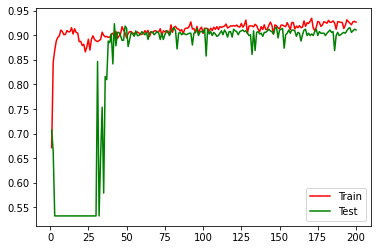

In [26]:
plt.plot(range(1,epochs+1),acc,'r-')
plt.plot(range(1,epochs+1),va,'g-')
plt.legend(["Train","Test"])
plt.show()  



Plot of accuracy vs epochs for the training data and test data 

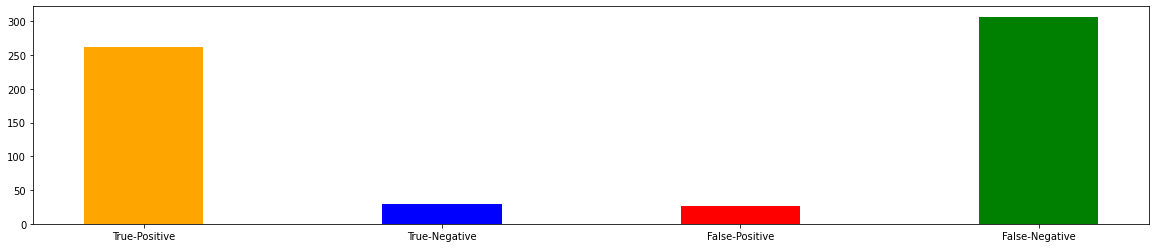

In [6]:
import matplotlib.pyplot as plt
cm=[[262,30],[26,307]]
lr1=[]
lr2=['True-Positive','True-Negative','False-Positive','False-Negative']
lr1.append(cm[0][0])
lr1.append(cm[0][1])
lr1.append(cm[1][0])
lr1.append(cm[1][1])
plt.figure(figsize=(20,4))
plt.bar(lr2,lr1,width=0.4,color=['orange','blue','Red','green'])

plt.show()